# Libraries

In [41]:
# Data Handling
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import ConfusionMatrixDisplay

# Models
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix,
    precision_recall_curve, auc, classification_report, roc_auc_score,
    precision_recall_fscore_support)
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Imbalance Handling
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.utils.class_weight import compute_class_weight

# Notebook functionality
from IPython.display import clear_output, display
import time 

# Dimensionnality reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import make_scorer

from sklearn.feature_selection import VarianceThreshold

# Load datasets

## Original dataset

In [2]:
# Define column names (since UCI does not provide them)
feature_columns = [f"feature_{i}" for i in range(590)]  # 590 features

# Load features
secom_features = pd.read_csv(
    "../secom/secom.data", 
    sep=" ", 
    names=feature_columns, 
    header=None, 
    engine='python'
)

In [3]:
# Load labels
secom_labels = pd.read_csv(
    "../secom/secom_labels.data", 
    sep=" ", 
    header=None, 
    usecols=[0]  # Only the first column contains the label
)

In [4]:
# Rename label column
secom_labels.columns = ["Label"]

# Convert labels: -1 (pass) -> 0, 1 (fail) -> 0
secom_labels["Label"] = secom_labels["Label"].replace({-1: 0, 1: 1})

# Combine features and labels into a single DataFrame
secom_data = pd.concat([secom_features, secom_labels], axis=1)

In [5]:
secom_data.head(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,0
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.5816,-0.0270,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,0
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5153,0.0157,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,0
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5358,0.0111,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,0
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,1.5381,0.0159,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,0


## Mice Imputed Dataset (secom_MICE)

In [6]:
secom_MICE = pd.read_csv('../secom/secom_MICE_imputed')

secom_MICE.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021247,0.015558,0.005138,100.525349,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,0


# Resampling + Modeling Pipeline

## Build Pipeline function

In [7]:
# Example pipeline: SMOTE + StandardScaler + RandomForest
def build_pipeline(sampler, model):
    return ImbPipeline([
        ('sampling', sampler),
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

## Evaluate Pipeline function (eval_pipeline(pipeline, X, y, cv=5) )

In [8]:
def eval_pipeline(pipeline, X, y, sampler_name='N/A', model_name='N/A', cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)
    y_proba = cross_val_predict(pipeline, X, y, cv=skf, method='predict_proba')[:, 1]

    precision, recall, _ = precision_recall_curve(y, y_proba)
    pr_auc = auc(recall, precision)

    result = {
        'Sampler': sampler_name,
        'Model': model_name,
        'Precision': precision_score(y, y_pred, zero_division=0),
        'Recall': recall_score(y, y_pred, zero_division=0),
        'F1-Score': f1_score(y, y_pred, zero_division=0),
        'ROC AUC': roc_auc_score(y, y_proba),
        'PR AUC': pr_auc,
        'Confusion Matrix': confusion_matrix(y, y_pred).tolist()
    }
    
    return result

## Define X and y

In [24]:
# define feature matrix
X = secom_MICE.drop(columns='Label')
# define target (no-defect = 0, defect = 1)
y = secom_MICE['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train, X_test, y_train, y_test)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_576,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589
415,2951.41,2577.27,2207.811100,1202.452000,1.621900,100.0,108.768900,0.1212,1.5440,-0.0163,...,2.0239,8.6470,0.5076,0.0206,0.0056,4.0586,0.0095,0.0173,0.0050,182.5607
879,2998.89,2532.66,2189.355600,2363.641200,2.141500,100.0,83.423300,0.1246,1.4108,0.0095,...,1.6245,13.2830,0.5022,0.0097,0.0027,1.9367,0.0147,0.0095,0.0028,65.0365
413,3083.49,2536.43,2213.755600,1113.559900,0.721700,100.0,104.166700,0.1211,1.5082,-0.0057,...,1.4765,14.9920,0.5040,0.0193,0.0044,3.8378,0.0145,0.0213,0.0074,146.5131
58,3004.09,2388.74,2223.800000,1503.124800,1.170500,100.0,110.060000,0.1211,1.4441,-0.0177,...,1.5400,12.0404,0.5049,0.0121,0.0035,2.4037,0.0207,0.0301,0.0096,145.6339
354,3031.79,2479.69,2186.988900,949.220100,1.298100,100.0,103.332200,0.1219,1.4636,0.0009,...,1.4091,13.3366,0.5035,0.0085,0.0024,1.6818,0.0484,0.0339,0.0105,70.0618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2995.26,2447.22,2185.100000,1201.049100,0.782100,100.0,105.848900,0.1208,1.3608,0.0250,...,1.5125,8.6853,0.5048,0.0132,0.0031,2.6094,0.0272,0.0171,0.0054,62.7655
1294,3020.70,2563.19,2164.266700,711.025800,1.288400,100.0,129.252200,0.1252,1.3571,-0.0165,...,1.8585,15.1191,0.4933,0.0128,0.0027,2.6032,0.0239,0.0066,0.0022,27.5232
860,3081.34,2453.78,2175.344500,1147.342100,1.141900,100.0,107.142200,0.1251,1.3997,0.0062,...,2.0351,9.0851,0.4985,0.0089,0.0028,1.7792,0.0220,0.0143,0.0045,65.2186
1459,3006.80,2536.87,2203.106093,1297.319813,4.132298,100.0,101.352766,0.0000,1.4814,0.0180,...,1.5218,17.2472,0.4974,0.0111,0.0034,2.2344,-0.0031,0.0168,0.0061,545.6838


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_576,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589
548,2929.60,2564.910000,2216.4778,1242.2350,0.8379,100.0,105.1111,0.1233,1.5190,-0.0053,...,1.8698,14.1723,0.4952,0.0120,0.0031,2.4192,0.0354,0.0146,0.0049,41.3226
664,2979.45,2546.780000,2217.8111,1744.7771,0.9618,100.0,100.1789,0.1218,1.4786,-0.0179,...,1.0039,16.1032,0.5040,0.0115,0.0026,2.2880,0.0263,0.0117,0.0033,44.3686
730,3136.34,2442.450000,2250.7445,996.4071,0.8572,100.0,106.2956,0.1172,1.4285,-0.0222,...,1.5984,13.2632,0.5022,0.0173,0.0040,3.4516,0.0335,0.0084,0.0030,25.1494
405,3052.97,2501.630000,2218.0555,1517.4371,0.8579,100.0,105.8133,0.1206,1.4732,-0.0063,...,1.4129,18.5733,0.5010,0.0108,0.0028,2.1487,0.0061,0.0141,0.0046,233.2441
175,3071.09,2521.230000,2248.4222,1418.5634,1.4905,100.0,102.6444,0.1212,1.6138,0.0146,...,1.8108,7.4657,0.4974,0.0130,0.0035,2.6058,0.0254,0.0160,0.0051,62.9443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,3014.85,2453.450000,2189.6778,1295.2883,2.1394,100.0,107.4811,0.1238,1.4214,0.0070,...,2.0113,14.5194,0.5004,0.0163,0.0035,3.2522,0.0230,0.0064,0.0024,27.7025
1509,2931.11,2485.990000,2208.5889,1116.3316,0.8396,100.0,107.6300,0.1207,1.3488,-0.0018,...,1.0187,17.8379,0.5051,0.0137,0.0038,2.7041,0.0311,0.0317,0.0107,101.9627
1189,3200.74,2534.160000,2244.9778,2208.4483,1.9074,100.0,87.2789,0.1217,1.4304,0.0214,...,1.0970,16.9045,0.5042,0.0108,0.0038,2.1341,0.0262,0.0104,0.0033,39.5528
1084,2978.96,2495.030588,2250.3667,1847.0925,2.0218,100.0,91.0589,0.1214,1.3809,0.0013,...,1.2805,13.5789,0.5045,0.0115,0.0033,2.2871,0.0389,0.0172,0.0052,44.2355


415     0
879     0
413     0
58      1
354     0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: Label, Length: 1253, dtype: int64

548     0
664     0
730     0
405     0
175     0
       ..
1309    0
1509    0
1189    1
1084    0
208     0
Name: Label, Length: 314, dtype: int64

## Define Samplers

In [12]:
samplers = {
    'None': 'passthrough',  # no resampling (baseline)
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'None': 'none'  # for class weighting only
}

## Define Models

In [13]:
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42),
    'LogisticRegression': LogisticRegression(class_weight='balanced', random_state=42), 
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

# Loop through Samplers w/ each model

In [14]:
results = []

for sampler_name, sampler in samplers.items():
    for model_name, model in models.items():
        if sampler == 'none' and 'class_weight' not in model.get_params():
            continue # skip if model can't handle class weights

        pipeline = build_pipeline(sampler if sampler != 'none' else 'passthrough', model)
        result = eval_pipeline(pipeline, X, y, sampler_name, model_name)
        results.append(result)

        # Show updated DataFrame
        clear_output(wait=True)
        results_df = pd.DataFrame(results)
        display(results_df)

        # Optional: pause to make the update visible
        time.sleep(0.5)

,Sampler,Model,Precision,Recall,F1-Score,ROC AUC,PR AUC,Confusion Matrix
0,None,RandomForest,0.000000,0.000000,0.000000,0.682847,0.132936,"[[1463, 0], [104, 0]]"
1,None,LogisticRegression,0.131579,0.240385,0.170068,0.680872,0.128853,"[[1298, 165], [79, 25]]"
2,SMOTE,RandomForest,0.333333,0.019231,0.036364,0.692465,0.140214,"[[1459, 4], [102, 2]]"
3,SMOTE,LogisticRegression,0.125000,0.211538,0.157143,0.675049,0.124242,"[[1309, 154], [82, 22]]"
4,SMOTE,XGBoost,0.250000,0.076923,0.117647,0.691756,0.177484,"[[1439, 24], [96, 8]]"
5,ADASYN,RandomForest,0.333333,0.019231,0.036364,0.708341,0.148423,"[[1459, 4], [102, 2]]"
6,ADASYN,LogisticRegression,0.129213,0.221154,0.163121,0.673182,0.122908,"[[1308, 155], [81, 23]]"
7,ADASYN,XGBoost,0.250000,0.067308,0.106061,0.677487,0.159274,"[[1442, 21], [97, 7]]"
8,SMOTEENN,RandomForest,0.191011,0.163462,0.176166,0.701493,0.141811,"[[1391, 72], [87, 17]]"
9,SMOTEENN,LogisticRegression,0.123552,0.307692,0.176309,0.654523,0.127005,"[[1236, 227], [72, 32]]"


## Plot results

### Confusion Matrix plot function

In [15]:
def plot_confusion_matrix(cm, model_name='[model]', sampler_name='[sampler]', labels=['No Defect: 0', 'Defect: 1']):
    title = f"{model_name} on {sampler_name}"
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels,
                annot_kws={"size": 18})
    plt.title(title, fontsize=20)
    plt.xlabel('Predicted Label', fontsize=16)
    plt.ylabel('True Label', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()

### PR curve plot function

In [16]:
def plot_pr_curve(y_true, y_proba, model_name='[model]', sampler_name='[sampler]'):
    title = f"{model_name} on {sampler_name}"
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='darkorange', lw=3,
             label=f'PR AUC = {pr_auc:.4f}')
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend(loc='lower left', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Plots

#### Confusion Matrix

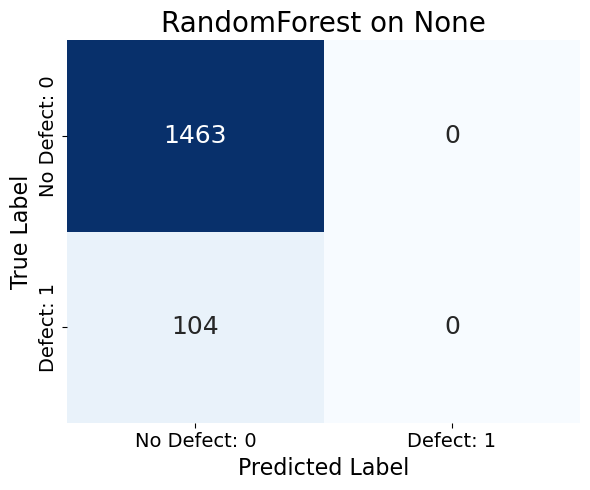

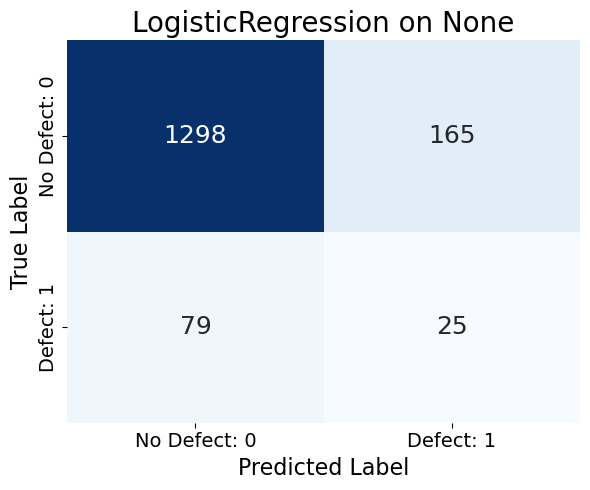

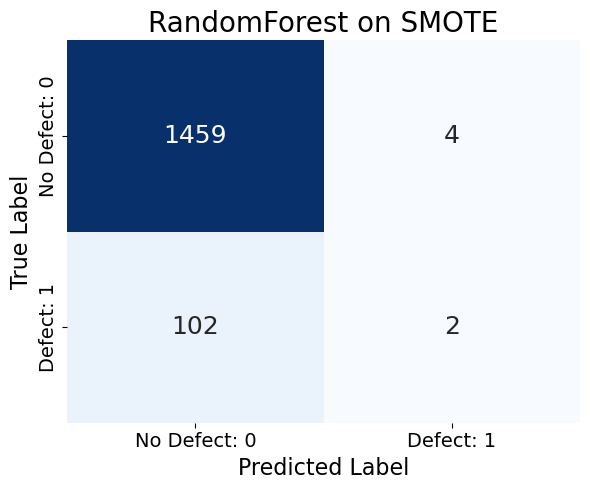

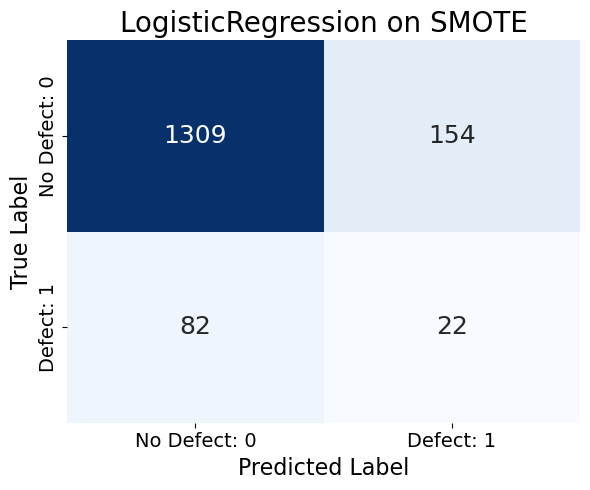

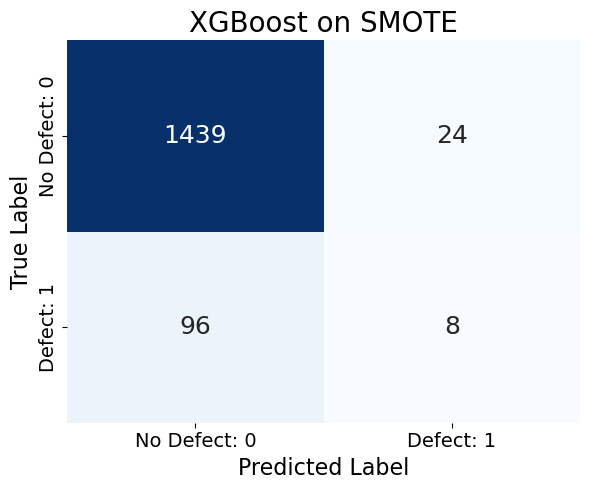

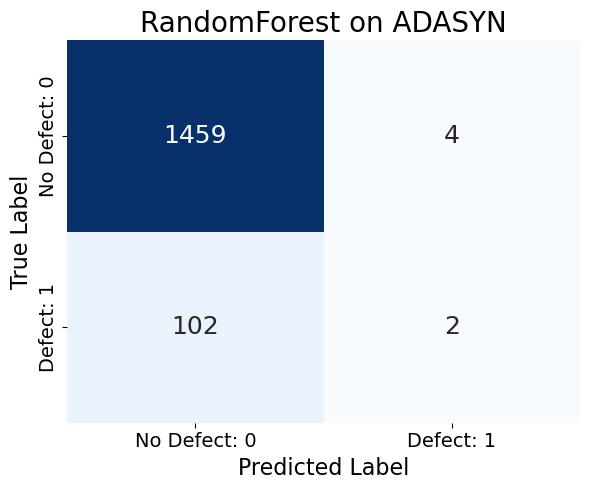

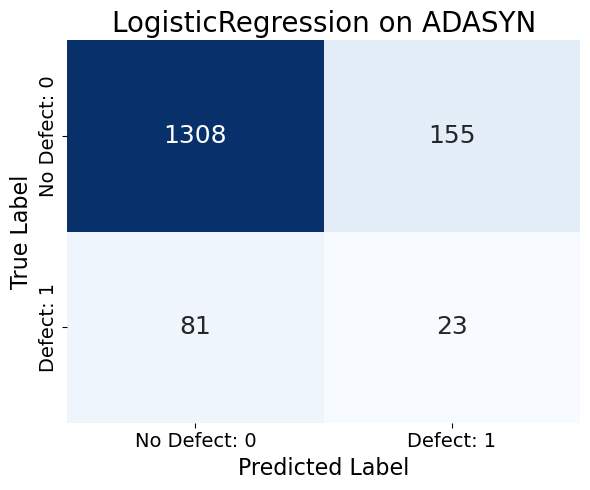

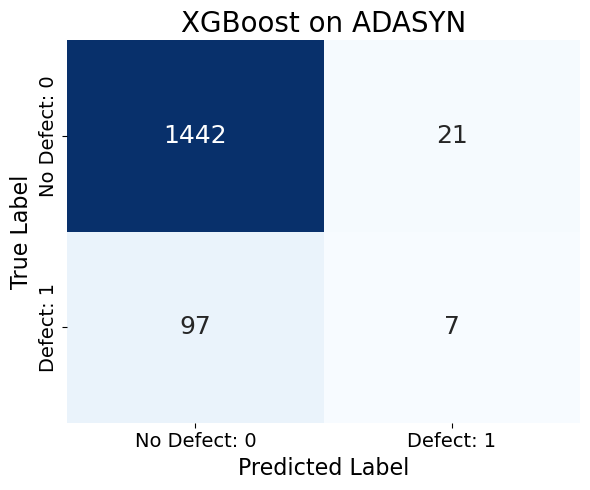

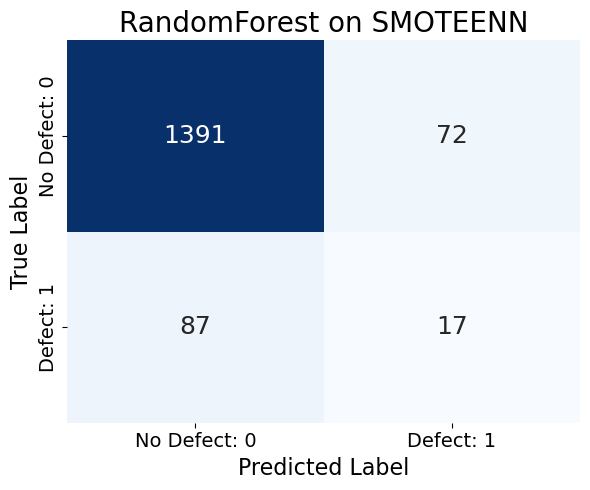

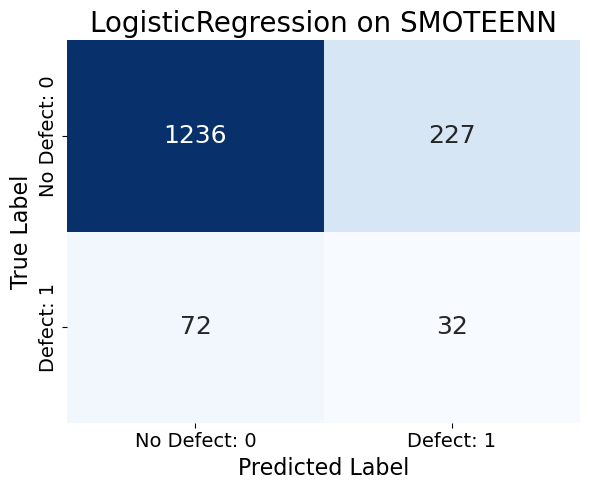

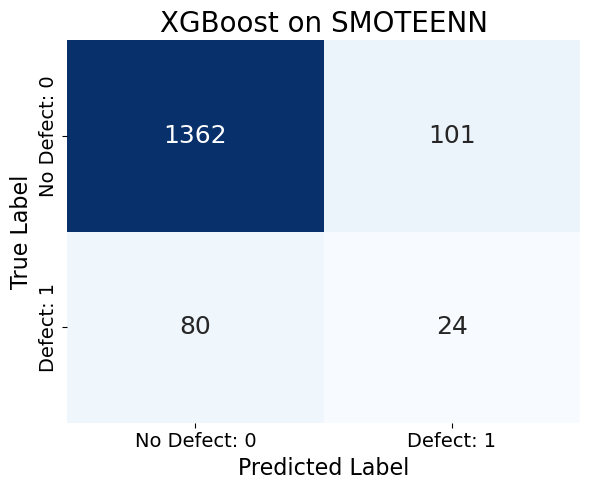

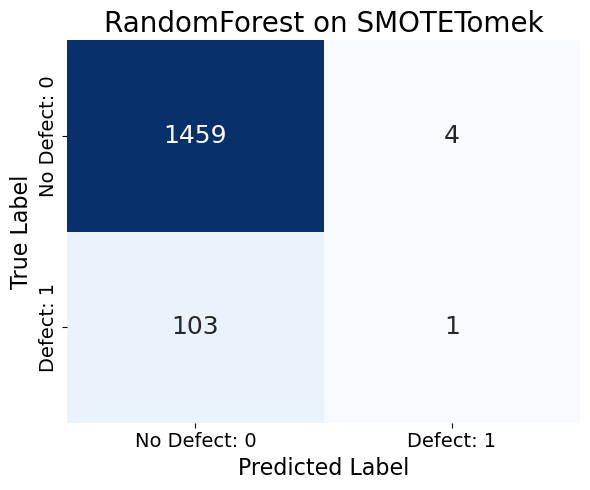

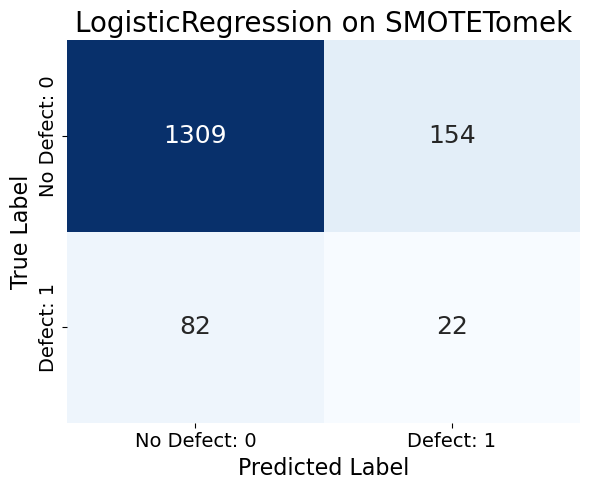

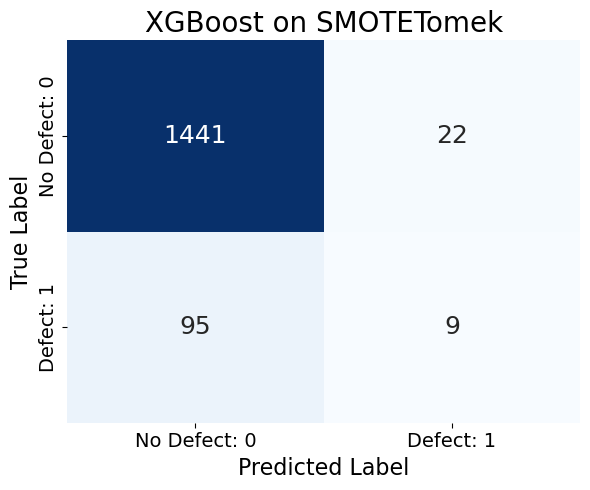

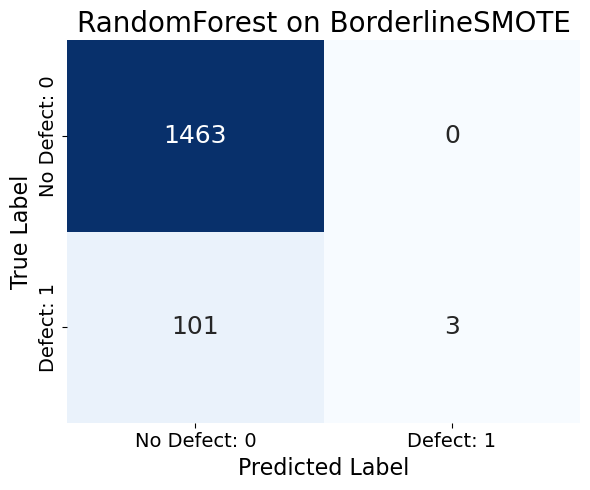

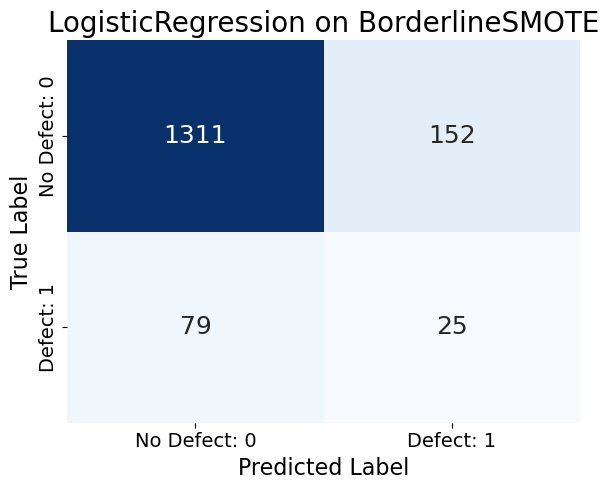

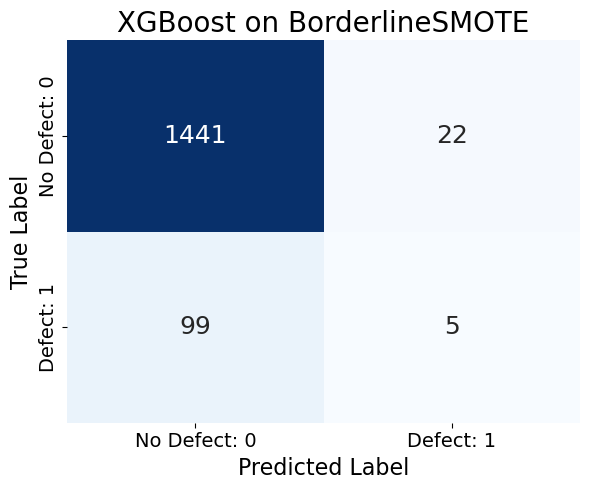

In [17]:
for _, row in results_df.iterrows():
    cm = row['Confusion Matrix']
    model_name = row['Model']
    sampler_name = row['Sampler']
    
    plot_confusion_matrix(
        cm,
        model_name=model_name,
        sampler_name=sampler_name,
        labels=['No Defect: 0', 'Defect: 1']
    )

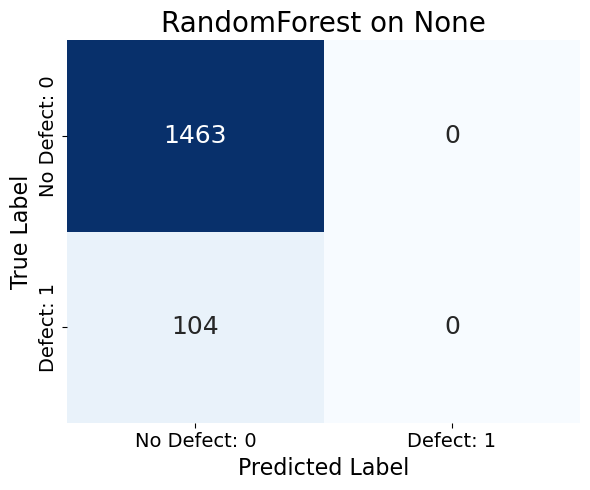

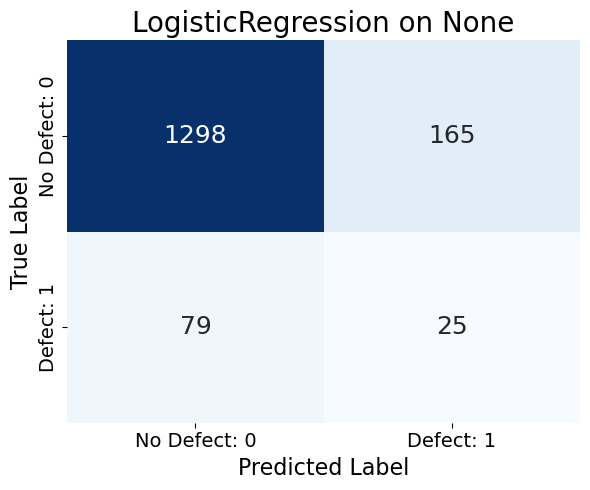

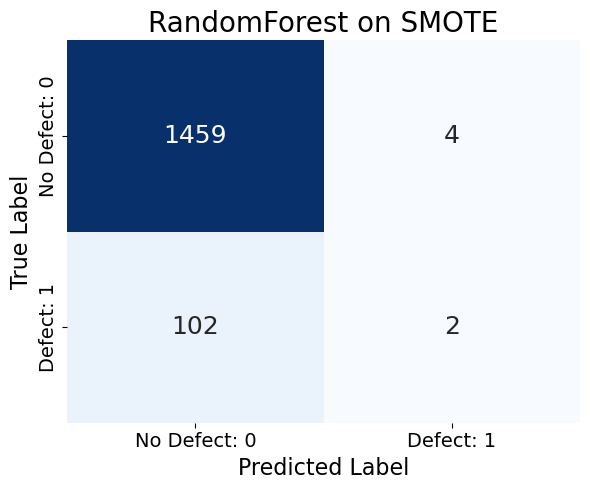

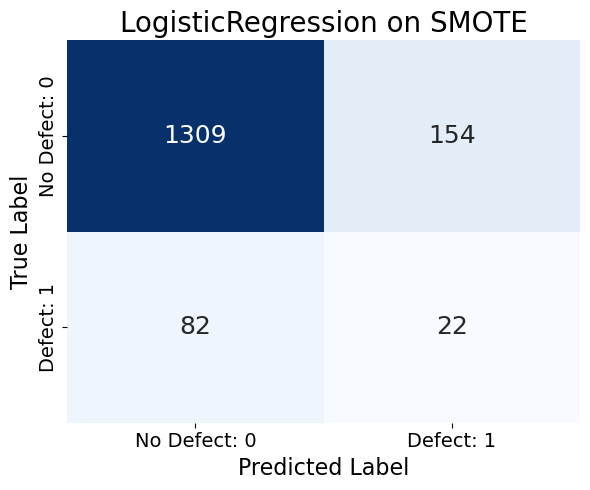

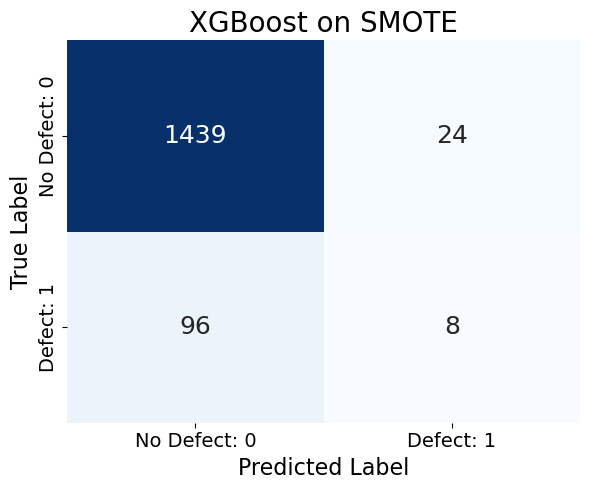

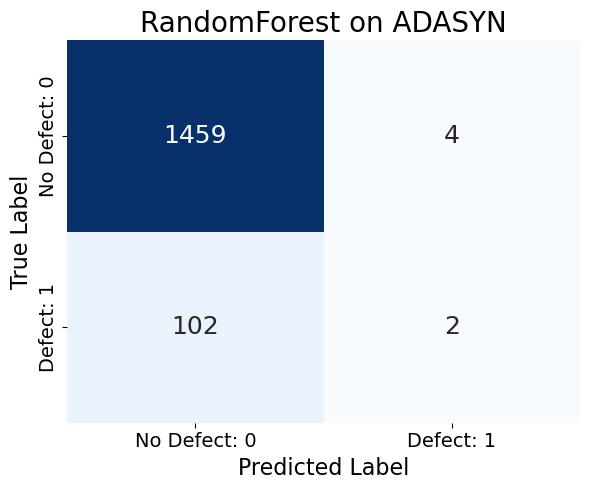

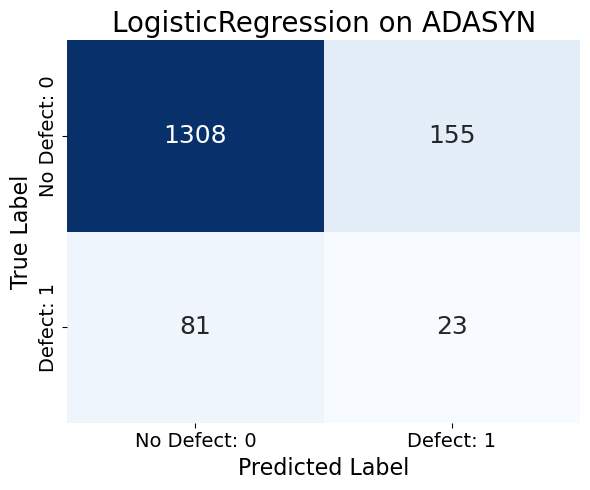

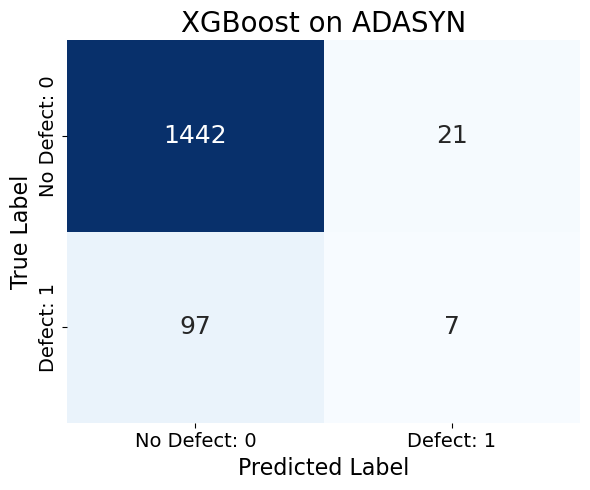

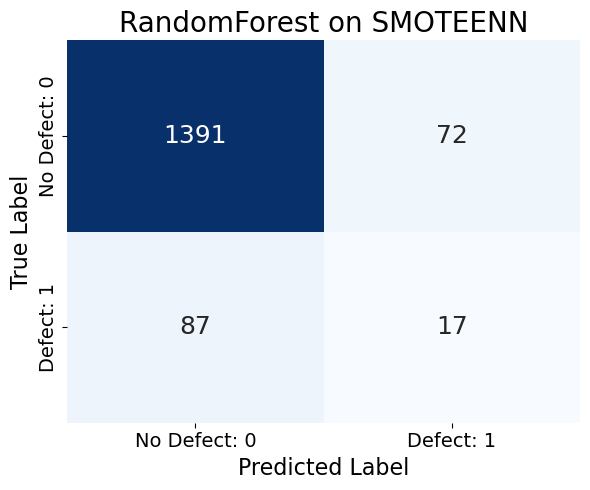

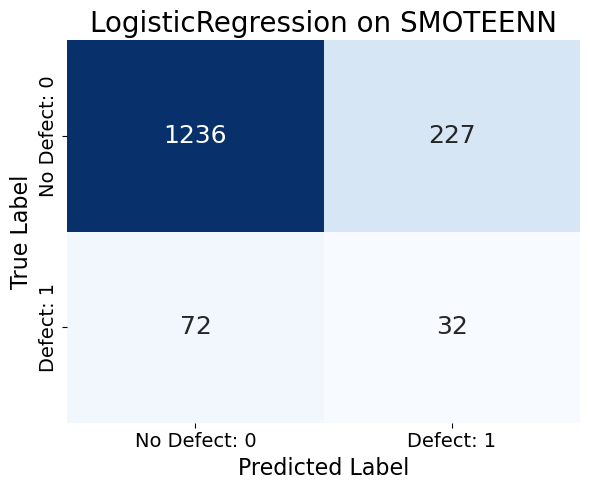

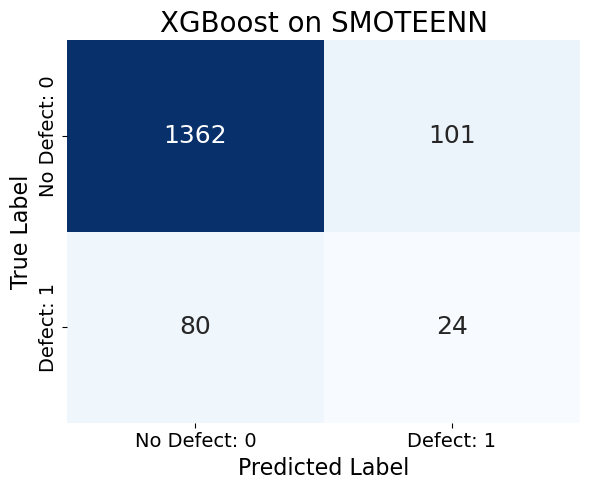

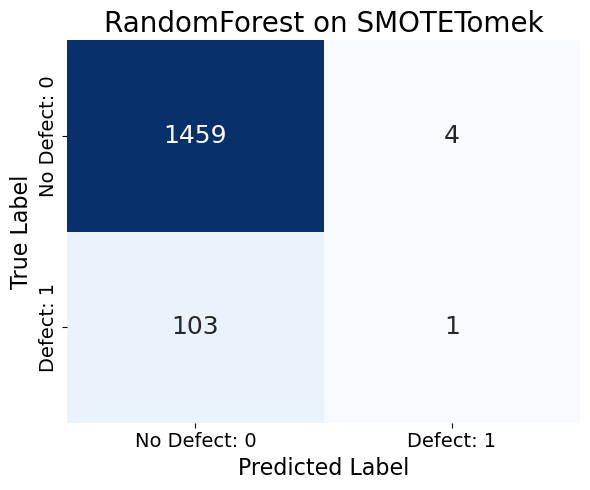

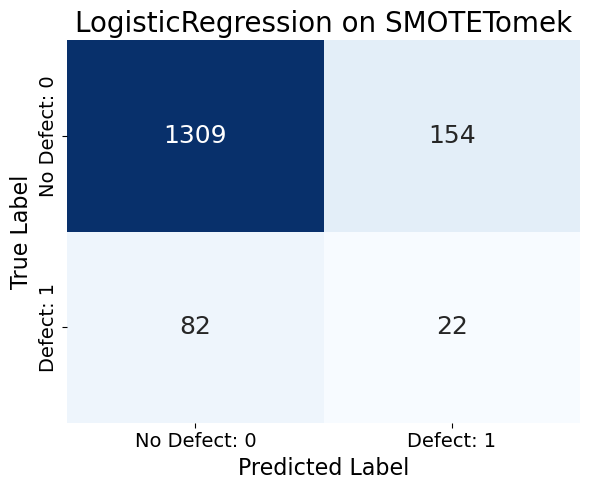

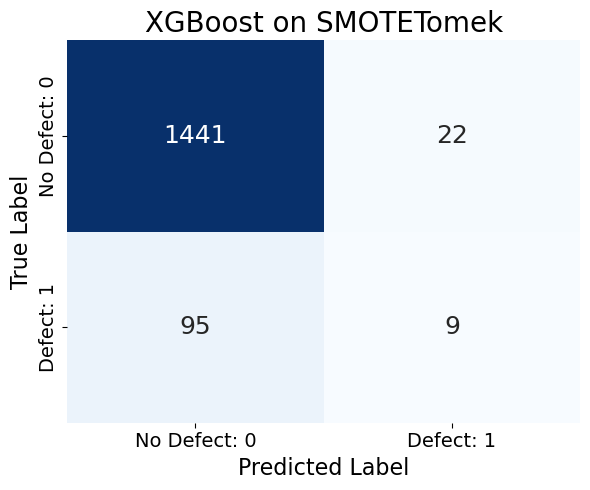

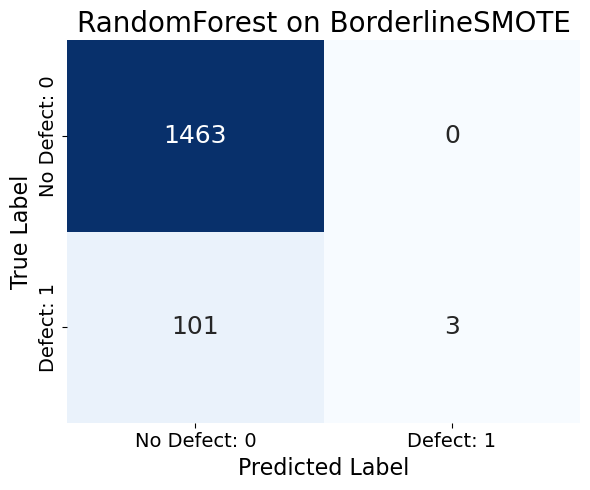

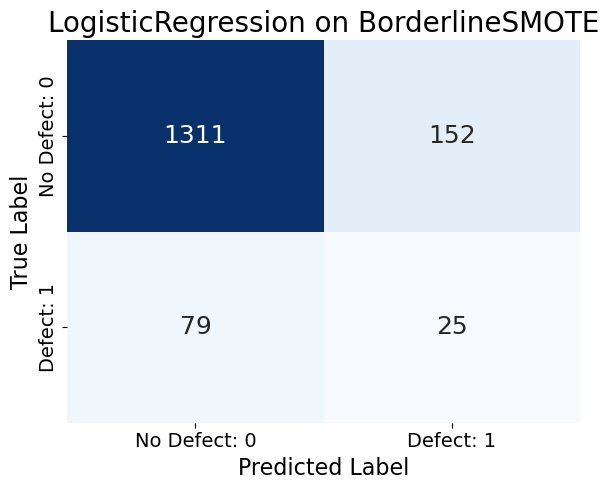

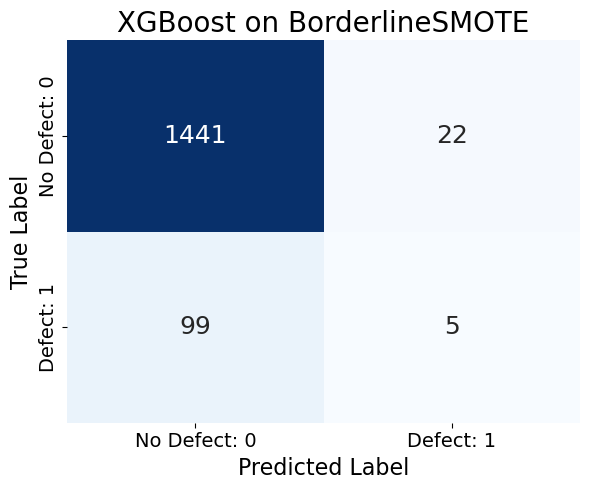

In [18]:
for _, row in results_df.iterrows():
    cm = row['Confusion Matrix']
    model_name = row['Model']
    sampler_name = row['Sampler']
    
    plot_confusion_matrix(
        cm,
        model_name=model_name,
        sampler_name=sampler_name,
        labels=['No Defect: 0', 'Defect: 1']
    )

In [19]:
def eval_model(df, model, test_size=0.2, n_splits=5, threshold=0.5):
    """
    Trains and evaluates a binary classification model, tracking both training and validation PR curves.

    Parameters:
        df (pd.DataFrame): Dataset with the last column as the binary label.
        model: Machine learning model (e.g., LogisticRegression, RandomForestClassifier, XGBClassifier).
        test_size (float): Proportion of data for validation (default = 0.2).
        n_splits (int): Number of cross-validation folds.
        threshold (float): Probability threshold for classification.

    Outputs:
        - Confusion Matrix and PR Curve visualization (for both training and validation)
        - Prints PR-AUC scores and classification report
    """

    # Separate features and labels
    X = df.iloc[:, :-1].values  # Features
    y = df.iloc[:, -1].values   # Labels (0 or 1)

    # Split into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Get predictions for training and validation sets
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_val_proba = model.predict_proba(X_val)[:, 1]

    # Convert probabilities to class labels based on the threshold
    y_train_pred = (y_train_proba >= threshold).astype(int)
    y_val_pred = (y_val_proba >= threshold).astype(int)

    # Compute Confusion Matrix for validation set
    cm = confusion_matrix(y_val, y_val_pred)

    # Compute Precision-Recall Curve and PR-AUC for both sets
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_proba)
    precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_proba)

    pr_auc_train = auc(recall_train, precision_train)
    pr_auc_val = auc(recall_val, precision_val)

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Confusion Matrix Plot (Validation Set)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1], ax=axes[0])
    axes[0].set_xlabel("Predicted Label")
    axes[0].set_ylabel("True Label")
    axes[0].set_title("Validation Set Confusion Matrix")

    # Precision-Recall Curve Plot (Train & Validation)
    axes[1].plot(recall_train, precision_train, label=f'Training PR-AUC = {pr_auc_train:.3f}', linestyle="--")
    axes[1].plot(recall_val, precision_val, label=f'Validation PR-AUC = {pr_auc_val:.3f}')
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("Precision-Recall Curve (Train vs. Validation)")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    # Print Classification Report for Validation Set
    print("Validation Classification Report:")
    print(classification_report(y_val, y_val_pred, digits=4))

    print("PR-AUC train = ", pr_auc_train,"\nPR-AUC validation = ", pr_auc_val)

    return pr_auc_train, pr_auc_val  # Returns both PR-AUC scores for comparison


In [20]:
secom_MICE.shape

(1567, 539)

In [21]:
X.shape

(1567, 538)

# Dimensionality Reduction

In [25]:
display(X_train, X_test, y_train, y_test)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_576,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589
415,2951.41,2577.27,2207.811100,1202.452000,1.621900,100.0,108.768900,0.1212,1.5440,-0.0163,...,2.0239,8.6470,0.5076,0.0206,0.0056,4.0586,0.0095,0.0173,0.0050,182.5607
879,2998.89,2532.66,2189.355600,2363.641200,2.141500,100.0,83.423300,0.1246,1.4108,0.0095,...,1.6245,13.2830,0.5022,0.0097,0.0027,1.9367,0.0147,0.0095,0.0028,65.0365
413,3083.49,2536.43,2213.755600,1113.559900,0.721700,100.0,104.166700,0.1211,1.5082,-0.0057,...,1.4765,14.9920,0.5040,0.0193,0.0044,3.8378,0.0145,0.0213,0.0074,146.5131
58,3004.09,2388.74,2223.800000,1503.124800,1.170500,100.0,110.060000,0.1211,1.4441,-0.0177,...,1.5400,12.0404,0.5049,0.0121,0.0035,2.4037,0.0207,0.0301,0.0096,145.6339
354,3031.79,2479.69,2186.988900,949.220100,1.298100,100.0,103.332200,0.1219,1.4636,0.0009,...,1.4091,13.3366,0.5035,0.0085,0.0024,1.6818,0.0484,0.0339,0.0105,70.0618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2995.26,2447.22,2185.100000,1201.049100,0.782100,100.0,105.848900,0.1208,1.3608,0.0250,...,1.5125,8.6853,0.5048,0.0132,0.0031,2.6094,0.0272,0.0171,0.0054,62.7655
1294,3020.70,2563.19,2164.266700,711.025800,1.288400,100.0,129.252200,0.1252,1.3571,-0.0165,...,1.8585,15.1191,0.4933,0.0128,0.0027,2.6032,0.0239,0.0066,0.0022,27.5232
860,3081.34,2453.78,2175.344500,1147.342100,1.141900,100.0,107.142200,0.1251,1.3997,0.0062,...,2.0351,9.0851,0.4985,0.0089,0.0028,1.7792,0.0220,0.0143,0.0045,65.2186
1459,3006.80,2536.87,2203.106093,1297.319813,4.132298,100.0,101.352766,0.0000,1.4814,0.0180,...,1.5218,17.2472,0.4974,0.0111,0.0034,2.2344,-0.0031,0.0168,0.0061,545.6838


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_576,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589
548,2929.60,2564.910000,2216.4778,1242.2350,0.8379,100.0,105.1111,0.1233,1.5190,-0.0053,...,1.8698,14.1723,0.4952,0.0120,0.0031,2.4192,0.0354,0.0146,0.0049,41.3226
664,2979.45,2546.780000,2217.8111,1744.7771,0.9618,100.0,100.1789,0.1218,1.4786,-0.0179,...,1.0039,16.1032,0.5040,0.0115,0.0026,2.2880,0.0263,0.0117,0.0033,44.3686
730,3136.34,2442.450000,2250.7445,996.4071,0.8572,100.0,106.2956,0.1172,1.4285,-0.0222,...,1.5984,13.2632,0.5022,0.0173,0.0040,3.4516,0.0335,0.0084,0.0030,25.1494
405,3052.97,2501.630000,2218.0555,1517.4371,0.8579,100.0,105.8133,0.1206,1.4732,-0.0063,...,1.4129,18.5733,0.5010,0.0108,0.0028,2.1487,0.0061,0.0141,0.0046,233.2441
175,3071.09,2521.230000,2248.4222,1418.5634,1.4905,100.0,102.6444,0.1212,1.6138,0.0146,...,1.8108,7.4657,0.4974,0.0130,0.0035,2.6058,0.0254,0.0160,0.0051,62.9443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,3014.85,2453.450000,2189.6778,1295.2883,2.1394,100.0,107.4811,0.1238,1.4214,0.0070,...,2.0113,14.5194,0.5004,0.0163,0.0035,3.2522,0.0230,0.0064,0.0024,27.7025
1509,2931.11,2485.990000,2208.5889,1116.3316,0.8396,100.0,107.6300,0.1207,1.3488,-0.0018,...,1.0187,17.8379,0.5051,0.0137,0.0038,2.7041,0.0311,0.0317,0.0107,101.9627
1189,3200.74,2534.160000,2244.9778,2208.4483,1.9074,100.0,87.2789,0.1217,1.4304,0.0214,...,1.0970,16.9045,0.5042,0.0108,0.0038,2.1341,0.0262,0.0104,0.0033,39.5528
1084,2978.96,2495.030588,2250.3667,1847.0925,2.0218,100.0,91.0589,0.1214,1.3809,0.0013,...,1.2805,13.5789,0.5045,0.0115,0.0033,2.2871,0.0389,0.0172,0.0052,44.2355


415     0
879     0
413     0
58      1
354     0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: Label, Length: 1253, dtype: int64

548     0
664     0
730     0
405     0
175     0
       ..
1309    0
1509    0
1189    1
1084    0
208     0
Name: Label, Length: 314, dtype: int64

## imbalance

In [27]:
sampler = SMOTEENN(random_state=42)

In [28]:
# Implement chosen sampler on dataset
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)


## Set up eval with dim reduction

In [29]:
scorer = make_scorer(f1_score, average='macro')

pipelines = {
    'PCA': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=30)),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    'LDA': Pipeline([
        ('scaler', StandardScaler()),
        ('lda', LDA(n_components=1)),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    'QDA': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', QDA())
    ]),
    'SelectKBest': Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=30)),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    'Autoencoder': 'Custom setup (deep learning framework required)'
}

## eval ea pipeline

In [30]:
results = []

for name, pipe in pipelines.items():
    if pipe == 'Custom setup (deep learning framework required)':
        print(f"{name}: Skipped (requires Keras/PyTorch)")
        continue

    print(f"Evaluating: {name}")
    scores = cross_val_score(pipe, X_resampled, y_resampled, cv=5, scoring=scorer)
    print(f"{name} mean F1 Score: {scores.mean():.4f}\n")
    results.append((name, scores.mean()))

Evaluating: PCA
PCA mean F1 Score: 0.9095

Evaluating: LDA
LDA mean F1 Score: 0.9287

Evaluating: QDA


/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA mean F1 Score: 1.0000

Evaluating: SelectKBest


/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  5  13  42  49  52  69  94 134 142 169 170 177 180 181 182 183 184 185
 216 219 220 221 222 223 224 225 226 227 230 231 232 233 242 243 244 245
 246 247 248 249 250 251 252 262 270 297 298 299 306 309 310 311 312 313
 314 345 350 351 352 353 354 355 356 359 360 361 362 371 372 373 374 375
 376 377 378 379 380 381 391 399 426 427 428 435 438 439 440 441 442 443
 458 474 477 478 479 480 481 482 483 484 485 488 489 490 491 500 501 502
 503 504 505 506 507 508 509 510] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarni

SelectKBest mean F1 Score: 0.9391

Autoencoder: Skipped (requires Keras/PyTorch)


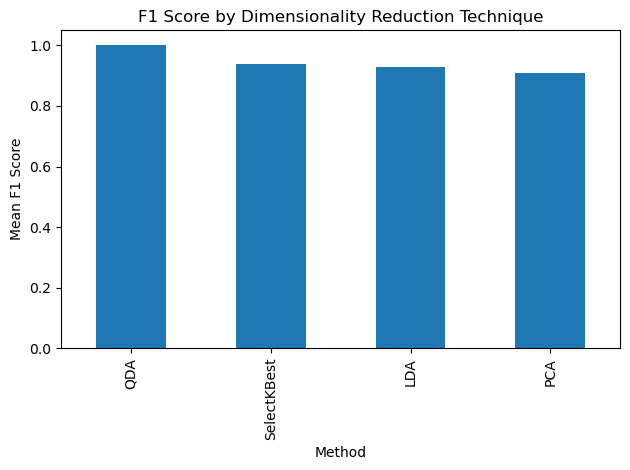

In [31]:
results_df = pd.DataFrame(results, columns=['Method', 'Mean F1 Score'])
results_df.sort_values('Mean F1 Score', ascending=False, inplace=True)

results_df.plot.bar(x='Method', y='Mean F1 Score', legend=False)
plt.title('F1 Score by Dimensionality Reduction Technique')
plt.ylabel('Mean F1 Score')
plt.tight_layout()
plt.show()

### remove constant features

In [33]:

# Remove features with zero variance
vt = VarianceThreshold(threshold=0.0)
X_train_var = vt.fit_transform(X_train)
X_test_var = vt.transform(X_test)

In [34]:
X_test_var.shape

(314, 422)

removed 116 columns of 0 variance

Evaluating: PCA
PCA Mean F1 Score: 0.9129

Evaluating: LDA
LDA Mean F1 Score: 0.9287

Evaluating: QDA


/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA Mean F1 Score: 0.8410

Evaluating: SelectKBest
SelectKBest Mean F1 Score: 0.9391



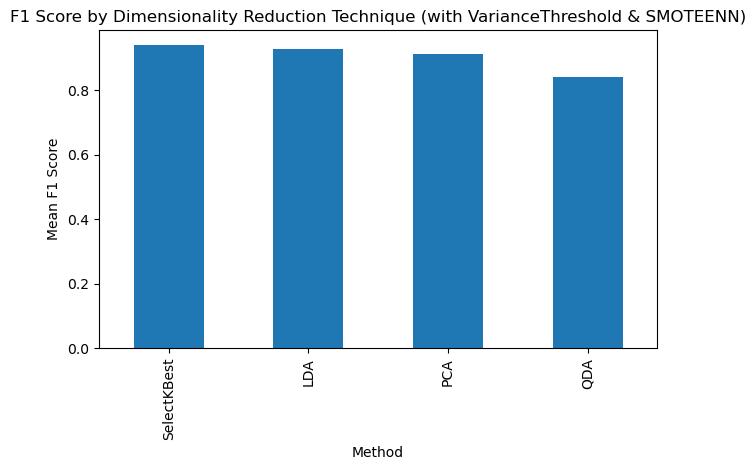

In [35]:
X_resampled, y_resampled = sampler.fit_resample(X_train_var, y_train)

# --- STEP 3: Define F1 scorer ---
scorer = make_scorer(f1_score, average='macro')

# --- STEP 4: Define pipelines with dimensionality reduction ---
pipelines = {
    'PCA': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=30)),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    'LDA': Pipeline([
        ('scaler', StandardScaler()),
        ('lda', LDA(n_components=1)),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ]),
    'QDA': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', QDA())
    ]),
    'SelectKBest': Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=30)),
        ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
    ])
}

# --- STEP 5: Evaluate each pipeline ---
results = []

for name, pipe in pipelines.items():
    print(f"Evaluating: {name}")
    scores = cross_val_score(pipe, X_resampled, y_resampled, cv=5, scoring=scorer)
    print(f"{name} Mean F1 Score: {scores.mean():.4f}\n")
    results.append((name, scores.mean()))

# --- STEP 6: Visualize results ---
results_df = pd.DataFrame(results, columns=['Method', 'Mean F1 Score'])
results_df.sort_values('Mean F1 Score', ascending=False, inplace=True)

results_df.plot.bar(x='Method', y='Mean F1 Score', legend=False)
plt.title('F1 Score by Dimensionality Reduction Technique (with VarianceThreshold & SMOTEENN)')
plt.ylabel('Mean F1 Score')
plt.tight_layout()
plt.show()

## Evaluate Best Pipeline (SelectKBest) on Test Set

In [36]:
# Re-apply VarianceThreshold to X_test
X_test_var = vt.transform(X_test)  # use vt from earlier VarianceThreshold step

# Final pipeline with SelectKBest + RandomForest
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif, k=30)),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Fit on resampled training data
final_pipeline.fit(X_resampled, y_resampled)

# Predict on holdout test set
y_pred = final_pipeline.predict(X_test_var)

# Print classification report
print("Test Set Evaluation (SelectKBest + RandomForest):")
print(classification_report(y_test, y_pred, digits=4))

Test Set Evaluation (SelectKBest + RandomForest):
              precision    recall  f1-score   support

           0     0.9280    0.8448    0.8845       290
           1     0.1000    0.2083    0.1351        24

    accuracy                         0.7962       314
   macro avg     0.5140    0.5266    0.5098       314
weighted avg     0.8647    0.7962    0.8272       314



In [38]:
from sklearn.svm import SVC

# Define classifiers to compare
classifiers = {
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'SVM': SVC(class_weight='balanced', kernel='rbf', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

# Evaluate each classifier within the SelectKBest pipeline
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=30)),
        ('clf', clf)
    ])
    print(f"Evaluating {name}...")
    scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=5, scoring='f1_macro')
    print(f"{name} Mean F1 Score: {scores.mean():.4f}\n")
    results.append((name, scores.mean()))

Evaluating RandomForest...
RandomForest Mean F1 Score: 0.9391

Evaluating LogisticRegression...
LogisticRegression Mean F1 Score: 0.7889

Evaluating SVM...
SVM Mean F1 Score: 0.9325

Evaluating XGBoost...


/home/reese_quinto/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:04:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/reese_quinto/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:06:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/reese_quinto/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:07:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/reese_quinto/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:08:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/reese_quinto/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13

XGBoost Mean F1 Score: 0.9537



In [39]:
# Clean your test set using the same VarianceThreshold from earlier
X_test_var = vt.transform(X_test)

# Define classifiers to test
classifiers = {
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'LogisticRegression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'SVM': SVC(class_weight='balanced', kernel='rbf', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Evaluate each classifier on the test set
for name, clf in classifiers.items():
    print(f"\nClassification Report for {name}")
    
    # Build pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=30)),
        ('clf', clf)
    ])
    
    # Fit on resampled training data
    pipeline.fit(X_resampled, y_resampled)
    
    # Predict on the cleaned test set
    y_pred = pipeline.predict(X_test_var)
    
    # Print classification report
    print(classification_report(y_test, y_pred, digits=4))


Classification Report for RandomForest
              precision    recall  f1-score   support

           0     0.9280    0.8448    0.8845       290
           1     0.1000    0.2083    0.1351        24

    accuracy                         0.7962       314
   macro avg     0.5140    0.5266    0.5098       314
weighted avg     0.8647    0.7962    0.8272       314


Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0     0.9474    0.7448    0.8340       290
           1     0.1395    0.5000    0.2182        24

    accuracy                         0.7261       314
   macro avg     0.5435    0.6224    0.5261       314
weighted avg     0.8856    0.7261    0.7869       314


Classification Report for SVM
              precision    recall  f1-score   support

           0     0.9331    0.8655    0.8980       290
           1     0.1333    0.2500    0.1739        24

    accuracy                         0.8185       314
   macro av

/home/reese_quinto/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0     0.9380    0.8345    0.8832       290
           1     0.1429    0.3333    0.2000        24

    accuracy                         0.7962       314
   macro avg     0.5404    0.5839    0.5416       314
weighted avg     0.8772    0.7962    0.8310       314



/home/reese_quinto/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:22:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/tmp/ipykernel_803/4113479752.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Classifier', y='Score', hue='Class', palette='Set2', ci=None, dodge=True)


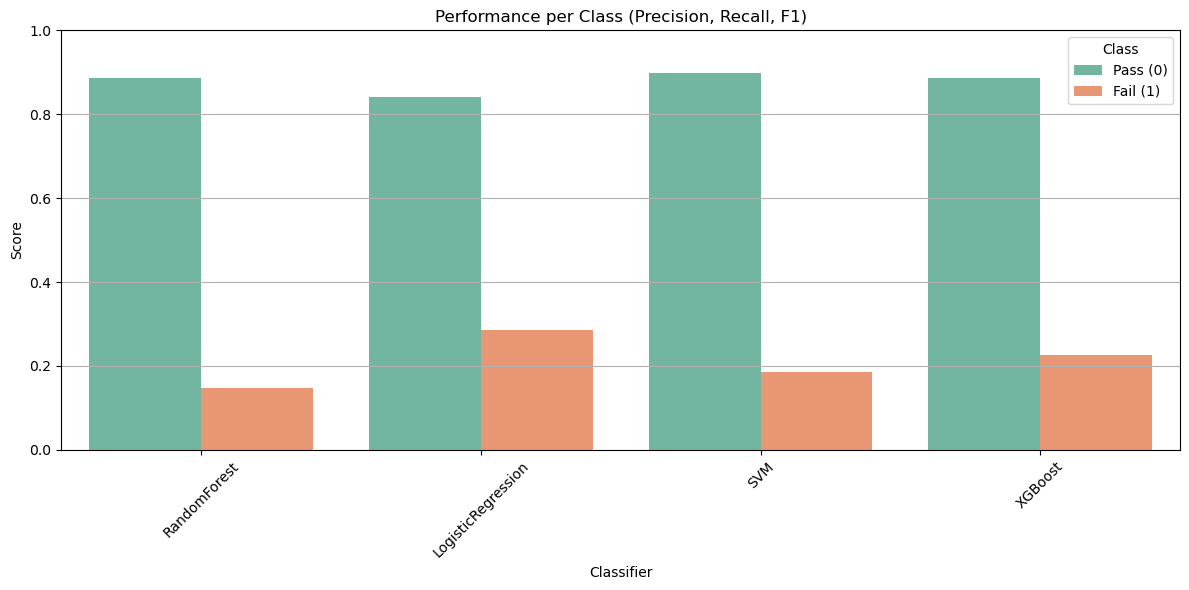

In [42]:
# Store metrics
clf_names = ['RandomForest', 'LogisticRegression', 'SVM', 'XGBoost']
reports = []

# Make predictions again (if needed) and collect metrics
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=30)),
        ('clf', clf)
    ])
    pipeline.fit(X_resampled, y_resampled)
    y_pred = pipeline.predict(X_test_var)
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])
    
    reports.append({
        'Classifier': name,
        'Class': 'Pass (0)',
        'Precision': precision[0],
        'Recall': recall[0],
        'F1 Score': f1[0]
    })
    reports.append({
        'Classifier': name,
        'Class': 'Fail (1)',
        'Precision': precision[1],
        'Recall': recall[1],
        'F1 Score': f1[1]
    })

# Convert to DataFrame
df = pd.DataFrame(reports)

# Melt the DataFrame for seaborn plotting
df_melted = df.melt(id_vars=['Classifier', 'Class'], value_vars=['Precision', 'Recall', 'F1 Score'],
                    var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Classifier', y='Score', hue='Class', palette='Set2', ci=None, dodge=True)
plt.title('Performance per Class (Precision, Recall, F1)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Class')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

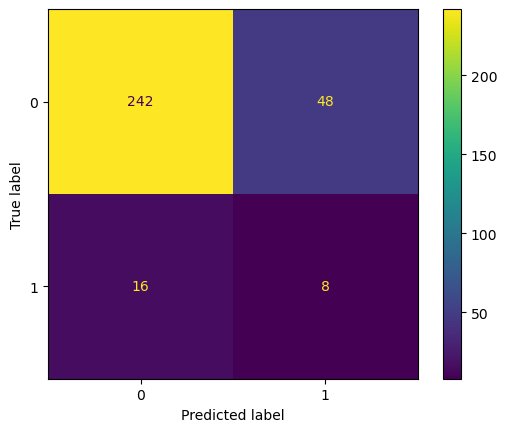

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


 Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0     0.9536    0.6379    0.7645       290
           1     0.1250    0.6250    0.2083        24

    accuracy                         0.6369       314
   macro avg     0.5393    0.6315    0.4864       314
weighted avg     0.8903    0.6369    0.7220       314


 Classification Report for RandomForest
              precision    recall  f1-score   support

           0     0.9236    0.9586    0.9408       290
           1     0.0769    0.0417    0.0541        24

    accuracy                         0.8885       314
   macro avg     0.5003    0.5001    0.4974       314
weighted avg     0.8589    0.8885    0.8730       314



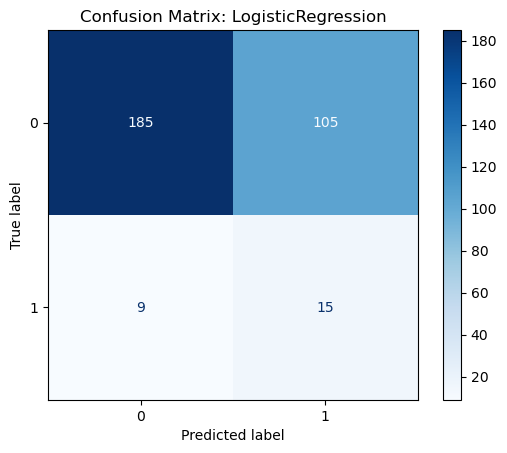

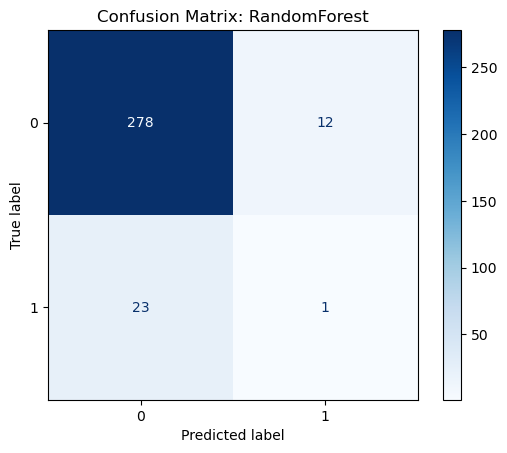

In [45]:
# STEP 1: Resample using BorderlineSMOTE with 1:1 class balance
smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_var, y_train)

# STEP 2: Define classifiers with custom class weights
classifiers = {
    'LogisticRegression': LogisticRegression(class_weight={0: 1, 1: 3}, max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=42)
}

# Clean the test set with the same VarianceThreshold
X_test_var = vt.transform(X_test)

# STEP 3: Evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n Classification Report for {name}")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=30)),
        ('clf', clf)
    ])

    pipeline.fit(X_resampled, y_resampled)
    y_pred = pipeline.predict(X_test_var)

    # Print classification report
    print(classification_report(y_test, y_pred, digits=4))

    # Show confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    disp.plot(cmap="Blues")
    disp.ax_.set_title(f'Confusion Matrix: {name}')

# Neural Network

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import BorderlineSMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.base import BaseEstimator, ClassifierMixin

# STEP 1: Balance training set using BorderlineSMOTE
smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_var, y_train)

# STEP 2: Clean test set
X_test_var = vt.transform(X_test)

In [50]:
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [51]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class KerasNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.model = create_nn_model(self.input_dim)

    def fit(self, X, y):
        self.model.fit(X, y, epochs=50, batch_size=32, verbose=0,
                       validation_split=0.1,
                       callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])
        return self

    def predict(self, X):
        preds = self.model.predict(X)
        return (preds > 0.5).astype(int).flatten()

# STEP 3: Build pipeline with SelectKBest -> StandardScaler -> Neural Net
pipeline_nn = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif, k=30)),
    ('nn', KerasNNWrapper(input_dim=30))
])

# Train on resampled data
pipeline_nn.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_nn = pipeline_nn.predict(X_test_var)

/home/reese_quinto/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744915677.158607     803 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-17 13:47:57.398300: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step



Classification Report for Neural Network
              precision    recall  f1-score   support

           0     0.9270    0.8759    0.9007       290
           1     0.1000    0.1667    0.1250        24

    accuracy                         0.8217       314
   macro avg     0.5135    0.5213    0.5129       314
weighted avg     0.8638    0.8217    0.8414       314



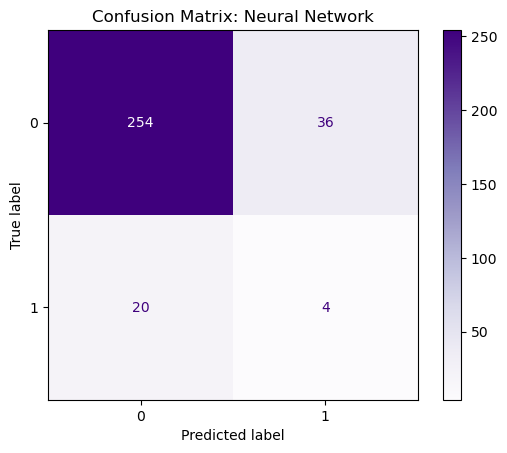

In [52]:
# Classification report
print("\nClassification Report for Neural Network")
print(classification_report(y_test, y_pred_nn, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Purples")
disp.ax_.set_title("Confusion Matrix: Neural Network")
plt.show()